# **Classification des prets**

* Importation des données et des bibliothèques

* Éxploration de données

  *   Identification des variables
  *   Analyse univariée
  *   Analyse multivariée
  *   Traitement des données manquantes
  *   Detection et traitement des outliers
  *   Features engineering

* Creation de Modéle

  *   1 er Modéle : Decision Tree
  *   2 eme Modéle : Neural Network




## **Importation des données et des bibliothèques**
- Source de donnees : Kaggle

- Description : Ces données appartiennent a un Hackathon organisé par "Univ.AI"

- URL : https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior  

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
!sudo pip3 install keras --quiet

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import opendatasets as od
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score,auc

In [4]:
download_url = 'https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: fatimz
Your Kaggle Key: ··········


100%|██████████| 5.15M/5.15M [00:00<00:00, 60.1MB/s]

In [5]:
data = pd.read_csv("loan-prediction-based-on-customer-behavior/Training Data.csv")

In [6]:
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


## **Éxploration de données**

### **Identification des variables**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [ ]:
#variable cible
data['Risk_Flag']

0         0
1         0
2         0
3         1
4         1
         ..
251995    0
251996    0
251997    0
251998    0
251999    0
Name: Risk_Flag, Length: 252000, dtype: int64

### **Analyse univariée**

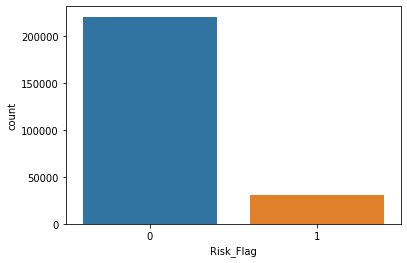

In [ ]:
sns.countplot(x = 'Risk_Flag', data = data)

Observation :
le nombre des prets payés est plus grand dans notre dataset.

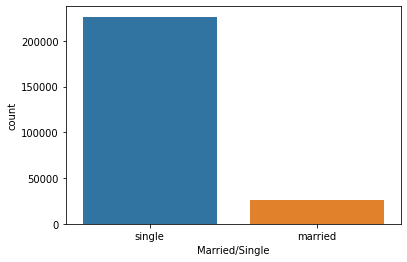

In [ ]:
sns.countplot(x = 'Married/Single', data = data)

Observation :
le nombre des gens celibataires est plus grand dans notre dataset.

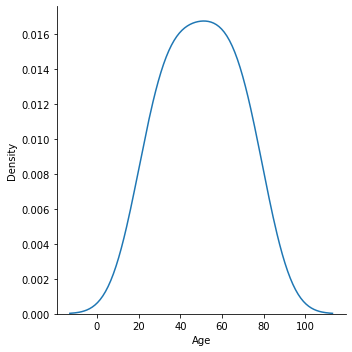

In [ ]:
sns.displot(x="Age", data = data, kind="kde", bw_adjust=8)

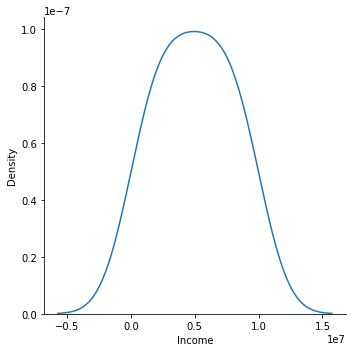

In [ ]:
sns.displot(x="Income", data = data, kind="kde", bw_adjust=8)

Observation :
l'Age et le revenu ne sont pas des facteurs aidant a la decision

### **Analyse multivariée**

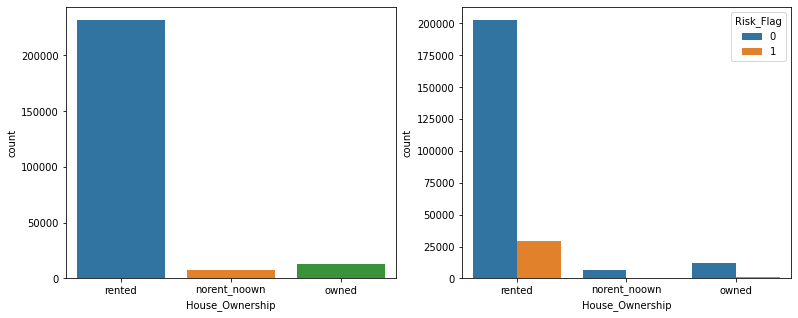

In [ ]:
#plt.figure(figsize=(13,8))
fig, ax =plt.subplots(1,2, figsize= (13,5))
sns.countplot(x ='House_Ownership', hue = "Risk_Flag", data = data, ax = ax[1])
sns.countplot(x ='House_Ownership', data = data, ax = ax[0])
fig.show()

In [ ]:
dc = pd.DataFrame()
dc['Income'] = data['Income']
dc['CURRENT_JOB_YRS'] = data['CURRENT_JOB_YRS']
dc['CURRENT_HOUSE_YRS'] = data['CURRENT_HOUSE_YRS']
dc.corr()

,Income,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
Income,1.000000,0.007045,-0.002397
CURRENT_JOB_YRS,0.007045,1.000000,0.005372
CURRENT_HOUSE_YRS,-0.002397,0.005372,1.000000


In [ ]:
data.groupby("Risk_Flag")["Income"].describe()

,count,mean,std,min,25%,50%,75%,max
Risk_Flag,,,,,,,,
0,221004.0,5.000449e+06,2.872255e+06,10310.0,2520632.75,5002134.0,7470480.0,9999938.0
1,30996.0,4.973359e+06,2.921065e+06,10675.0,2421029.00,4977653.0,7556052.0,9994501.0


Observation :
il n y a pas une grande difference entre les prets payés et ceux non payés 

Intuition : STATE , CITY et Profession sont corrélés avec Income

### **Traitement des données manquantes**

In [ ]:
data.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

Observation : Il n'y a pas de données manquantes

### **Detection et traitement des outliers**

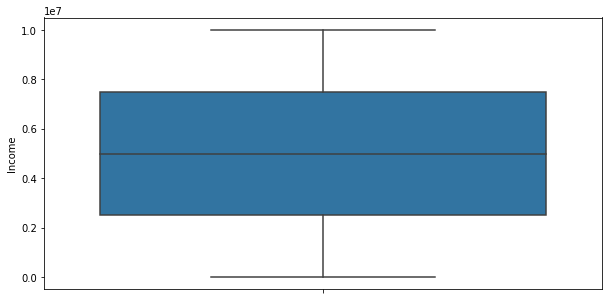

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(y="Income", data = data)

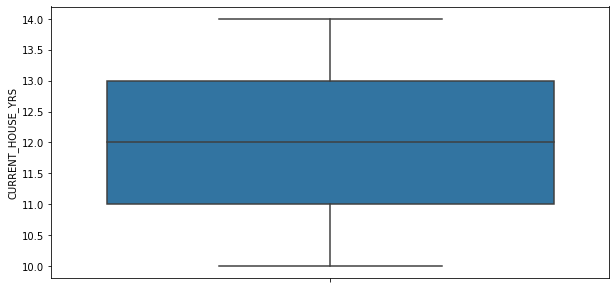

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(y="CURRENT_HOUSE_YRS", data = data)

Observation : Il n'y a pas de Outliers

### **Features Engineering**

#### **Categorical Variables and Dummy Variables**

In [ ]:
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [7]:
#converting variables into dummy variables
dummies=pd.get_dummies(data[['Married/Single', 'House_Ownership','Car_Ownership']],drop_first=True)

#concatinating with orginal data
df=pd.concat([data.drop(['Married/Single', 'House_Ownership','Car_Ownership'],axis=1),dummies],axis=1)

In [8]:
df = df.drop(['Profession', 'CITY', 'STATE'],axis=1)

In [9]:
df.head()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes
0,1,1303834,23,3,3,13,0,1,0,1,0
1,2,7574516,40,10,9,13,0,1,0,1,0
2,3,3991815,66,4,4,10,0,0,0,1,0
3,4,6256451,41,2,2,12,1,1,0,1,1
4,5,5768871,47,11,3,14,1,1,0,1,0


## **Creation de Modéle**

### **Train, Test Spit**

Manuellement

In [10]:
training_data = df.sample(frac=0.8, random_state=25)
testing_data = df.drop(training_data.index)
x_training = training_data.drop(['Risk_Flag'],axis=1)
y_training = training_data['Risk_Flag']
x_test = testing_data.drop(['Risk_Flag'],axis=1)
y_test = testing_data['Risk_Flag']

In [11]:
x_test_array = x_test.to_numpy()
y_test_array = y_test.to_numpy()
x_training_array = x_training.to_numpy()
y_training_array = y_training.to_numpy()

Fonctions predefinies

In [ ]:
#data2=df.sample(frac=.5,random_state=101)
#X=data2.drop("Risk_Flag",axis=1).values
#y=data2["Risk_Flag"].values

#spliting the data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### **Features Scaling** 

In [12]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(x_training_array)
X_test=scaler.transform(x_test_array)

### **Creation de modele**

####**Decision Tree Model**

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [14]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_training)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [16]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8539484126984127


In [18]:
result = pd.DataFrame(y_pred,columns=['Risk_Flag_pred'])
result['Risk_Flag'] = y_test.to_numpy()
result.head()

,Risk_Flag_pred,Risk_Flag
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


####**Neural Network Model**

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
model = Sequential()

model.add(Dense(78,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(39,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(19,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(19,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")


early_stop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=5)

In [21]:
model.fit(x=X_train,y=y_training_array,epochs=50,batch_size=1000,validation_data=(X_test,y_test_array),callbacks=[early_stop])

Epoch 1/50
202/202 [==============================] - 3s 9ms/step - loss: 0.4299 - val_loss: 0.3693
Epoch 2/50
202/202 [==============================] - 2s 8ms/step - loss: 0.3845 - val_loss: 0.3679
Epoch 3/50
202/202 [==============================] - 2s 8ms/step - loss: 0.3793 - val_loss: 0.3665
Epoch 4/50
202/202 [==============================] - 2s 7ms/step - loss: 0.3763 - val_loss: 0.3638
Epoch 5/50
202/202 [==============================] - 2s 8ms/step - loss: 0.3729 - val_loss: 0.3616
Epoch 6/50
202/202 [==============================] - 2s 8ms/step - loss: 0.3717 - val_loss: 0.3605
Epoch 7/50
202/202 [==============================] - 2s 8ms/step - loss: 0.3700 - val_loss: 0.3603
Epoch 8/50
202/202 [==============================] - 2s 8ms/step - loss: 0.3688 - val_loss: 0.3584
Epoch 9/50
202/202 [==============================] - 2s 8ms/step - loss: 0.3681 - val_loss: 0.3581
Epoch 10/50
202/202 [==============================] - 2s 8ms/step - loss: 0.3674 - val_loss: 0.3576

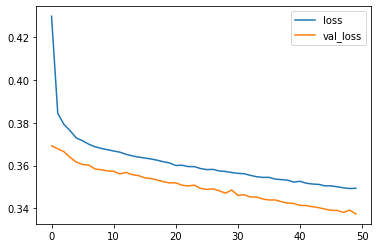

In [22]:
loss=pd.DataFrame(model.history.history)

loss.plot()

In [23]:
#predict=model.predict(X_test)
#classes_x=np.argmax(predict,axis=1)
predict = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test_array,predict))

1575/1575 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     44266
           1       1.00      0.00      0.00      6134

    accuracy                           0.88     50400
   macro avg       0.94      0.50      0.47     50400
weighted avg       0.89      0.88      0.82     50400



In [25]:
result_mod2 = pd.DataFrame(predict,columns=['Risk_Flag_pred'])
result_mod2['Risk_Flag'] = y_test.to_numpy()
result_mod2.head()

,Risk_Flag_pred,Risk_Flag
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
